<a href="https://colab.research.google.com/github/minnji88/DeepLearning2020/blob/master/3_4_%EC%98%81%ED%99%94%EB%A6%AC%EB%B7%B0_%EB%B6%84%EB%A5%98_%EC%9D%B4%EC%A7%84%EB%B6%84%EB%A5%98_%EC%98%88%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 세 가지 기본예제
1. 영화 리뷰를 긍정 또는 부정으로 분류하기 (이진 분류)
2. 신문기사를 토픽으로 분류하기 (다중 분류)
3. 부동산 데이터를 바탕으로 주택 가격을 예측하기(회귀)

## 3.1 신경망의 **구조**
- **네트워크**를 구성하는 층
- **입력 데이터**와 그에 상응하는 **타깃**
- 학습에 사용할 피드백 신호를 정의하는 **손실 함수**
- 학습 진행 방식을 결정하는 **옵티마이저**



![image](https://tensorflowkorea.files.wordpress.com/2018/12/093.jpg)


In [1]:
# Sequential 모델
from keras import models
from keras import layers

model = models.Sequential()
# 첫 번째 차원이 784인 2D 텐서를 입력으로 받는 층 -> 첫 번째 차원크기를 32로 변환된 텐서 출력
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

In [2]:
# 함수형 API
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=input_tensor, outputs=output_tensor)

In [3]:
# 컴파일 단계
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='mse',
              metrics=['accuracy'])
# model.fit(input_tensor, target_tensor, batch_size=128, epochs=10)

## 영화 리뷰 분류: 이진 분류 예제

리뷰 텍스트를 기반으로 영화 리뷰를 긍정과 부정으로 분류하는 방법

### IMDB 데이터 셋

In [4]:
# 코드 3-1 IMDB 데이터셋 로드하기
# 훈련데이터에서 가장 자주 나타나는 단어 1만 개만 사용하겠다는 의미
from keras.datasets import imdb

(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words = 10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

### 3.4.2 데이터 준비

In [5]:
# 정수 시퀀스를 이진 행렬로 인코딩하기
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension)이고 모든 원소가 0인 행렬을 만듭니다.
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # results[i]에서 특정 인덱스의 위치를 1로 만듭니다.
    return results
    
'''
신경망에 숫자 리스트를 주입할 수 없으므로 가능한 형태로 변환한다
여기서는 단어 인덱스 범위가 10000이므로 0-10000 사이의 단어들이 있는지 없는지 판단 할 수 있는 배열로 만든다
예를들어, sequence 중에 4번과 18번이 있다면 그 인덱스는 1.0이 된다.
'''
x_train = vectorize_sequences(train_data) # 훈련 데이터를 벡터로 변환합니다.
x_test = vectorize_sequences(test_data) # 테스트 데이터를 벡터로 변환합니다.


In [6]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [7]:
y_train = np.asarray(train_labels).astype('float32') # 참조본 생성
y_test = np.asarray(test_labels).astype('float32')

### 신경망 모델 만들기

- 16개의 은닉 유닛을 가진 2개의 은닉 층

- 현재 리뷰의 감정을 스칼라 값의 예측으로 출력하는 세 번째 층

#### relu 함수 = 음수를 0으로 만드는 함수
![image](https://tensorflowkorea.files.wordpress.com/2018/12/108.jpg)

#### 시그모이드 함수 = [0,1] 사이로 임의의 값을 확률처럼 출력

![image](https://tensorflowkorea.files.wordpress.com/2018/12/109_1.jpg)

#### 3개의 층으로 된 신경망
![image](https://tensorflowkorea.files.wordpress.com/2018/12/109_2.jpg?w=392&h=600)

In [8]:
# 코드 3-3 모델 정의하기
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### 모델 컴파일하기

손실함수와 옵티마이저 선택

*(확률을 출력하는 모델) = 크로스엔트로피*
*원본과 예측 분포사이의 확률 분포간 차이 측정*

RMSprop 옵티마이저 사용 | 
측정지표 : accuracy

In [9]:
# 코드 3-4 모델 컴파일하기
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
# 옵티마이저 설정하기
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
# 손실과 측정을 함수 객체로 지정하기
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

## 훈련 검증


In [12]:
# 검증 세트 준비하기
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### 모델 훈련하기

In [13]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
history
acc : 훈련 정확도
loss : 훈련 손실값
val_acc : 검증 손실값
val_loss : 검증 정확도
'''
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=20,
                    batch_size= 512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 35ms/step - loss: 0.6039 - accuracy: 0.7109 - val_loss: 0.4086 - val_accuracy: 0.8679
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3383 - accuracy: 0.9080 - val_loss: 0.3332 - val_accuracy: 0.8762
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2476 - accuracy: 0.9259 - val_loss: 0.3008 - val_accuracy: 0.8822
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1910 - accuracy: 0.9408 - val_loss: 0.2835 - val_accuracy: 0.8852
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1559 - accuracy: 0.9525 - val_loss: 0.2757 - val_accuracy: 0.8891
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1208 - accuracy: 0.9654 - val_loss: 0.2850 - val_accuracy: 0.8870
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1056 - accuracy: 0.9705 - val_loss: 0.3115 - val_accuracy: 0.8803
Epoch 8/20
30

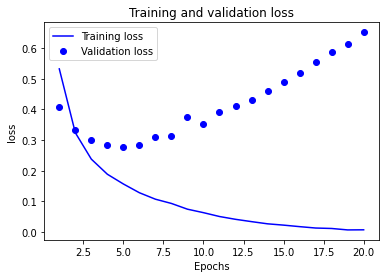

In [14]:
# 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training loss')         #'bo'는 파란색 점을 의미함
plt.plot(epochs, val_loss, 'bo', label = 'Validation loss')  #'b' 파란색 실선을 의미함
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

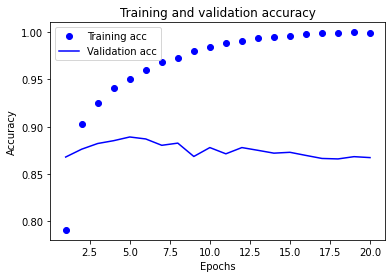

In [15]:
plt.clf() # 그래프를 초기화합니다.
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Overfitting(과대 적합): 훈련데이터에 과도하게 최적화되어 훈련세트 이외의 데이터에는 일반화되지 못한다

In [16]:
# 모델을 처음부터 다시 훈련하기
model = models.Sequential()
model.add(layers.Dense(16, activation= 'relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation= 'relu')) 
model.add(layers.Dense(1, activation= 'sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 4, batch_size = 512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 11ms/step - loss: 0.5727 - accuracy: 0.7230
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2850 - accuracy: 0.9059
Epoch 3/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2035 - accuracy: 0.9309
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3016 - accuracy: 0.8803


In [17]:
print(results)    # 88% 정확도 달성

[0.30158090591430664, 0.8802800178527832]


### 훈련된 모델로 새로운 데이터에 대해 예측하기

In [18]:
model.predict(x_test)

array([[0.17422454],
       [0.9986866 ],
       [0.78046024],
       ...,
       [0.11414635],
       [0.05948128],
       [0.4571858 ]], dtype=float32)